In [163]:
# Install and import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import os
from scipy.stats import spearmanr, pearsonr
from sklearn.linear_model import LinearRegression
!pip install openpyxl


[notice] A new release of pip is available: 25.0 -> 25.0.1
[notice] To update, run: pip install --upgrade pip


In [164]:
# Set working directory
os.chdir("/Users/giorgostziouvaras/Desktop")

In [165]:
# Read the Excel file
data = pd.read_excel("Rural_66.xlsx")

In [166]:
# Data preprocessing
data1 = data.copy()
data1['fatigue'] = data1['fatigue'].astype('category')
data1['Volume'] = data1['Volume'].astype('category')
data1['fatigue_levels_driving'] = data1['fatigue_levels_driving'].astype(int)
data1['hrs_awake'] = data1['hrs_awake'].astype(int)

In [167]:
# Check the structure of the data
print(data1.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135 entries, 0 to 134
Columns: 106 entries, Participant to Avg_ReactionTime
dtypes: category(2), float64(69), int64(34), object(1)
memory usage: 110.3+ KB
None


In [168]:
# ---- Correlation Analysis ----

# Correlation for discrete variables
cor_tb = data1[['fatigue', 'Volume']]
cor_result, _ = spearmanr(cor_tb['fatigue'].cat.codes, cor_tb['Volume'].cat.codes)
print("Spearman Correlation (fatigue, Volume):", cor_result)

Spearman Correlation (fatigue, Volume): -0.007462686567164181


In [169]:
# Correlation for continuous variables
cor_tb2 = data1[['hrs_awake', 'fatigue_levels_driving']]
cor_result2, _ = pearsonr(cor_tb2['hrs_awake'], cor_tb2['fatigue_levels_driving'])
print("Pearson Correlation (hrs_awake, fatigue_levels_driving):", cor_result2)


Pearson Correlation (hrs_awake, fatigue_levels_driving): 0.2299981819119139


In [170]:
X = pd.get_dummies(data1[['fatigue', 'Volume', 'hrs_awake', 'fatigue_levels_driving']], drop_first=True)
X = X.apply(pd.to_numeric, errors='coerce').fillna(X.mean())  # Ensure numeric and handle NaNs
y = pd.to_numeric(data1['Avg_ReactionTime'], errors='coerce')  # Ensure target variable is numeric
lm_model = sm.OLS(y, sm.add_constant(X.astype(float))).fit()  # Convert X to float
print(lm_model.summary())



                            OLS Regression Results                            
Dep. Variable:       Avg_ReactionTime   R-squared:                       0.541
Model:                            OLS   Adj. R-squared:                  0.527
Method:                 Least Squares   F-statistic:                     38.37
Date:                Wed, 26 Mar 2025   Prob (F-statistic):           3.56e-21
Time:                        11:11:07   Log-Likelihood:                -32.932
No. Observations:                 135   AIC:                             75.86
Df Residuals:                     130   BIC:                             90.39
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      1

In [171]:
# Print the summary of the linear regression model
print(lm_model.summary())

                            OLS Regression Results                            
Dep. Variable:       Avg_ReactionTime   R-squared:                       0.541
Model:                            OLS   Adj. R-squared:                  0.527
Method:                 Least Squares   F-statistic:                     38.37
Date:                Wed, 26 Mar 2025   Prob (F-statistic):           3.56e-21
Time:                        11:11:08   Log-Likelihood:                -32.932
No. Observations:                 135   AIC:                             75.86
Df Residuals:                     130   BIC:                             90.39
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      1

In [172]:
# ---- Summary Statistics ----
print(data1.describe())

       Participant    scenario  years license  years drive  days rural  \
count   135.000000  135.000000     135.000000   135.000000  135.000000   
mean     17.659259    1.503704       4.851852     4.407407    5.851852   
std      10.162973    0.501848       2.287273     2.462544    2.856045   
min       1.000000    1.000000       1.000000     1.000000    1.000000   
25%       9.000000    1.000000       3.000000     2.000000    3.000000   
50%      17.000000    2.000000       5.000000     5.000000    8.000000   
75%      26.000000    2.000000       6.000000     6.000000    8.000000   
max      35.000000    2.000000      12.000000    12.000000    8.000000   

         km_rural  routes_per_day_rural  driving_liking  \
count  135.000000            135.000000      135.000000   
mean     1.622222              1.244444        3.674074   
std      1.064114              1.493602        0.998728   
min      1.000000              0.000000        2.000000   
25%      1.000000              0.00000

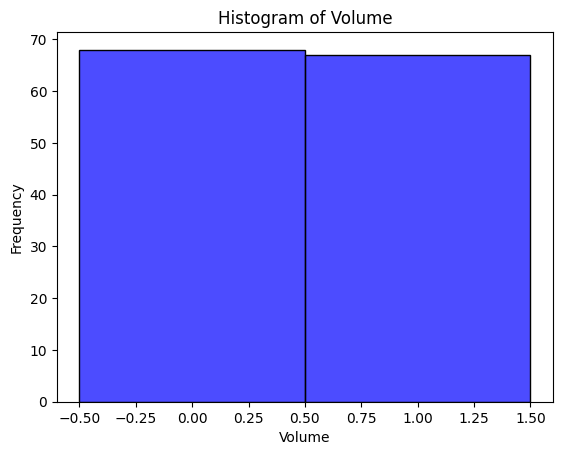

In [173]:
# ---- Data Visualization ----

# Histogram of Volume
sns.histplot(data1['Volume'], discrete=True, color='blue', alpha=0.7)
plt.title("Histogram of Volume")
plt.xlabel("Volume")
plt.ylabel("Frequency")
plt.show()


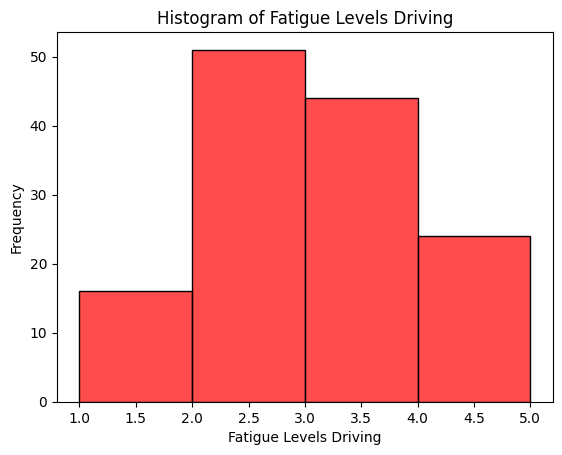

In [174]:
# Histogram of Fatigue Levels Driving
sns.histplot(data1['fatigue_levels_driving'], bins=range(data1['fatigue_levels_driving'].min(), data1['fatigue_levels_driving'].max() + 1), color='red', alpha=0.7)
plt.title("Histogram of Fatigue Levels Driving")
plt.xlabel("Fatigue Levels Driving")
plt.ylabel("Frequency")
plt.show()


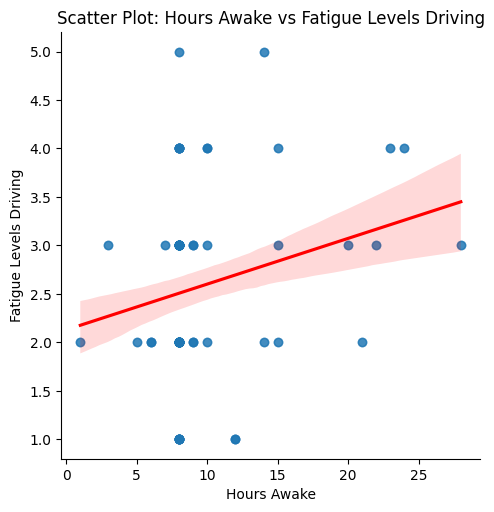

In [175]:
# Scatter Plot: Hours Awake vs. Fatigue Levels Driving
sns.lmplot(x='hrs_awake', y='fatigue_levels_driving', data=data1, scatter_kws={'alpha':0.6}, line_kws={'color':'red'})
plt.title("Scatter Plot: Hours Awake vs Fatigue Levels Driving")
plt.xlabel("Hours Awake")
plt.ylabel("Fatigue Levels Driving")
plt.show()

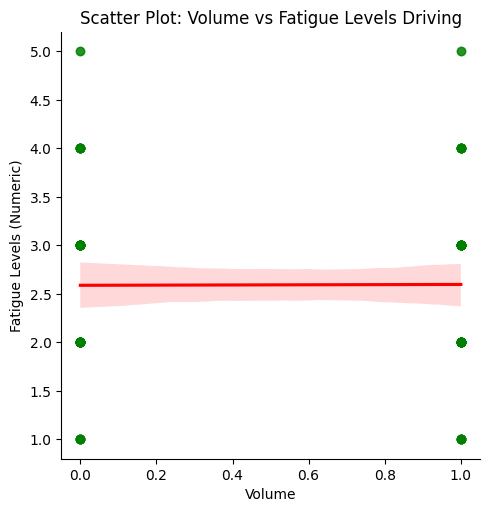

In [182]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure 'fatigue_levels_driving' is an ordered categorical variable
if data1['fatigue_levels_driving'].dtype.name == 'category':
    data1['fatigue_levels_driving'] = data1['fatigue_levels_driving'].cat.as_ordered()
    data1['fatigue_levels_numeric'] = data1['fatigue_levels_driving'].cat.codes
else:
    data1['fatigue_levels_numeric'] = pd.to_numeric(data1['fatigue_levels_driving'], errors='coerce')

# Drop NaN values if any
data1 = data1.dropna(subset=['fatigue_levels_numeric'])

# Scatter Plot: Volume vs. Fatigue Levels Driving
sns.lmplot(x='Volume', y='fatigue_levels_numeric', data=data1, 
           scatter_kws={'alpha': 0.6, 'color': 'green'}, 
           line_kws={'color': 'red'})

plt.title("Scatter Plot: Volume vs Fatigue Levels Driving")
plt.xlabel("Volume")
plt.ylabel("Fatigue Levels (Numeric)")
plt.show()



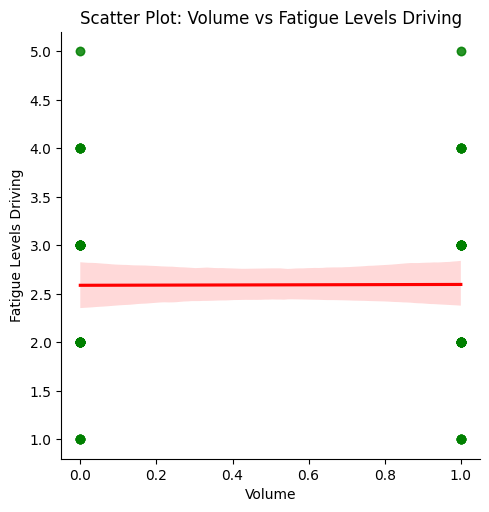

In [177]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure the columns are numeric
data1['fatigue_levels_driving'] = pd.to_numeric(data1['fatigue_levels_driving'], errors='coerce')
data1['Volume'] = pd.to_numeric(data1['Volume'], errors='coerce')

# Remove rows with NaN values in the columns of interest
data1 = data1.dropna(subset=['Volume', 'fatigue_levels_driving'])

# Scatter Plot: Volume vs. Fatigue Levels Driving
sns.lmplot(x='Volume', y='fatigue_levels_driving', data=data1, 
           scatter_kws={'alpha': 0.6, 'color': 'green'}, 
           line_kws={'color': 'red'})

plt.title("Scatter Plot: Volume vs Fatigue Levels Driving")
plt.xlabel("Volume")
plt.ylabel("Fatigue Levels Driving")
plt.show()



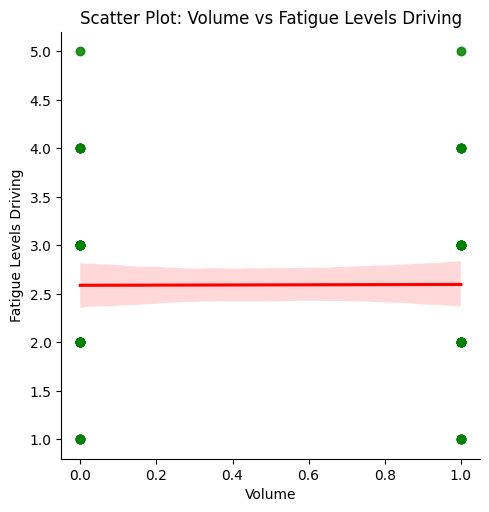

In [178]:
# Scatter Plot: Volume vs. Fatigue Levels Driving
sns.lmplot(x='Volume', y='fatigue_levels_driving', data=data1, scatter_kws={'alpha':0.6, 'color':'green'}, line_kws={'color':'red'})
plt.title("Scatter Plot: Volume vs Fatigue Levels Driving")
plt.xlabel("Volume")
plt.ylabel("Fatigue Levels Driving")
plt.show()

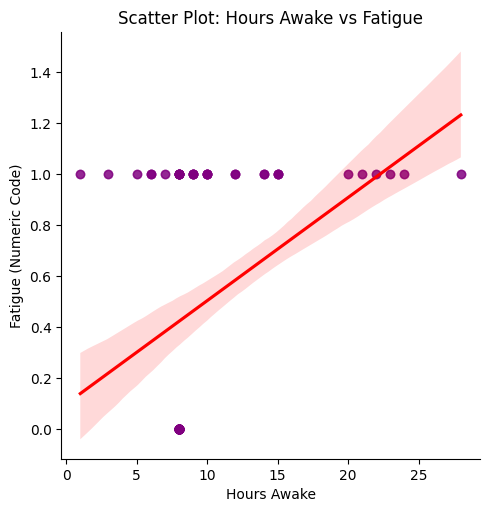

In [179]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure 'fatigue' is a categorical column
data1['fatigue'] = data1['fatigue'].astype('category')

# Convert 'hrs_awake' to numeric (if not already)
data1['hrs_awake'] = pd.to_numeric(data1['hrs_awake'], errors='coerce')

# Convert 'fatigue' to numeric codes (this will be used for the scatter plot)
data1['fatigue_codes'] = data1['fatigue'].cat.codes

# Remove rows with NaN values in either 'hrs_awake' or 'fatigue_codes'
data1 = data1.dropna(subset=['hrs_awake', 'fatigue_codes'])

# Scatter Plot: Hours Awake vs. Fatigue (using numeric codes for 'fatigue')
sns.lmplot(x='hrs_awake', y='fatigue_codes', data=data1,
           scatter_kws={'alpha': 0.6, 'color': 'purple'},
           line_kws={'color': 'red'})

plt.title("Scatter Plot: Hours Awake vs Fatigue")
plt.xlabel("Hours Awake")
plt.ylabel("Fatigue (Numeric Code)")
plt.show()


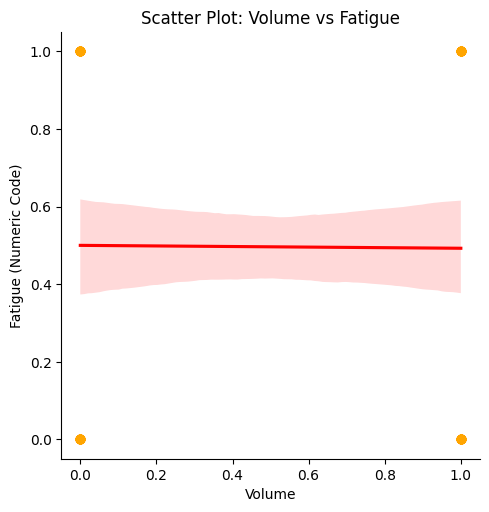

In [180]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Convert 'fatigue' to a categorical column if it's not already
data1['fatigue'] = data1['fatigue'].astype('category')

# Make the 'fatigue' column ordered (this will resolve the min/max issue)
data1['fatigue'] = data1['fatigue'].cat.as_ordered()

# Convert 'Volume' to numeric (if it's not already)
data1['Volume'] = pd.to_numeric(data1['Volume'], errors='coerce')

# Create a numeric column for 'fatigue' codes
data1['fatigue_numeric'] = data1['fatigue'].cat.codes

# Drop rows with NaN values in 'Volume' or 'fatigue_numeric'
data1 = data1.dropna(subset=['Volume', 'fatigue_numeric'])

# Scatter Plot: Volume vs. Fatigue (Numeric)
sns.lmplot(x='Volume', y='fatigue_numeric', data=data1, 
           scatter_kws={'alpha': 0.6, 'color': 'orange'}, 
           line_kws={'color': 'red'})

plt.title("Scatter Plot: Volume vs Fatigue")
plt.xlabel("Volume")
plt.ylabel("Fatigue (Numeric Code)")
plt.show()
